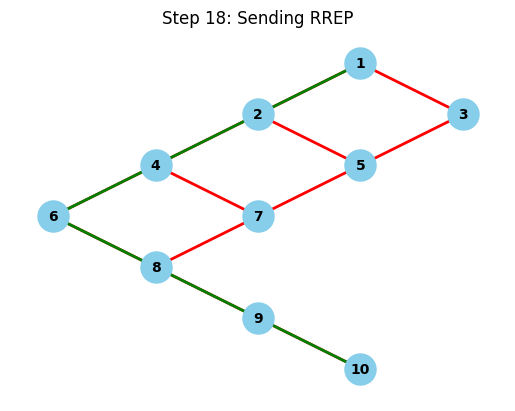

In [1]:
import tkinter as tk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time

class NetworkRoutingVisualization:
    def __init__(self, master):
        self.master = master
        self.master.title("Network Routing Visualization")

        # Create a figure and axis for the network graph
        self.fig, self.ax = plt.subplots()
        self.ax.set_title("Step 0: Initial State")
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.master)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        # Create a graph
        self.G = nx.Graph()

        # Add nodes
        nodes = range(1, 11)
        self.G.add_nodes_from(nodes)

        # Add edges
        edges = [(1, 2), (1, 3), (2, 4),(2,5),(4,7), (3, 5), (4, 6), (5, 7), (6, 8), (7, 8), (8, 9), (9, 10)]
        self.G.add_edges_from(edges)

        # Define positions for better visualization
        self.pos = {
            1: (0, 2),
            2: (-1, 1),
            3: (1, 1),
            4: (-2, 0),
            5: (0, 0),
            6: (-3, -1),
            7: (-1, -1),
            8: (-2, -2),
            9: (-1, -3),
            10: (0, -4)
        }

        # Draw the graph
        nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')

        # Define the path from source to destination
        self.source_to_dest_path = [(1, 2),(1,3),(2, 4),(2,5),(3,5), (4, 6),(4, 7),(5,7), (6, 8),(7,8), (8, 9), (9, 10)]

        # Define the path from destination back to source
        self.dest_to_source_path = [(10, 9), (9, 8), (8, 6), (6, 4), (4, 2), (2, 1)]

        # Button to start visualization
        self.start_button = tk.Button(master, text="Start", command=self.start_simulation)
        self.start_button.pack(side=tk.BOTTOM)

    def start_simulation(self):
        self.start_button.config(state=tk.DISABLED)  # Disable button during simulation

        # Show sending RREQ process step by step
        for i in range(len(self.source_to_dest_path) + 1):
            self.ax.clear()
            nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
            if i > 0:
                nx.draw_networkx_edges(self.G, self.pos, edgelist=self.source_to_dest_path[:i], ax=self.ax, edge_color='red', width=2)
            self.ax.set_title(f"Step {i}: Sending RREQ")
            self.canvas.draw()
            self.master.update()
            time.sleep(1)

        # Show sending RREP process step by step
        for i in range(len(self.dest_to_source_path) + 1):
            self.ax.clear()
            nx.draw(self.G, self.pos, ax=self.ax, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
            nx.draw_networkx_edges(self.G, self.pos, edgelist=self.source_to_dest_path, ax=self.ax, edge_color='red', width=2)
            if i > 0:
                # Send RREP through the best path (dest_to_source_path)
                nx.draw_networkx_edges(self.G, self.pos, edgelist=self.dest_to_source_path[:i], ax=self.ax, edge_color='green', width=2)
            self.ax.set_title(f"Step {len(self.source_to_dest_path) + i}: Sending RREP")
            self.canvas.draw()
            self.master.update()
            time.sleep(1)

        self.start_button.config(state=tk.NORMAL)  # Enable button after simulation


def main():
    root = tk.Tk()
    app = NetworkRoutingVisualization(root)
    root.mainloop()

if __name__ == "__main__":
    main()
